<a href="https://colab.research.google.com/github/tugbargn/Machine-Learning-/blob/main/Densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 13536 images belonging to 2 classes.
Found 13536 images belonging to 2 classes.
Epoch 1/10
423/423 [==============================] - 213s 493ms/step - loss: 0.6884 - accuracy: 0.5868 - val_loss: 0.6910 - val_accuracy: 0.5570
Epoch 2/10
423/423 [==============================] - 206s 487ms/step - loss: 0.6883 - accuracy: 0.5779 - val_loss: 0.6910 - val_accuracy: 0.5570
Epoch 3/10
423/423 [==============================] - 207s 488ms/step - loss: 0.6884 - accuracy: 0.5861 - val_loss: 0.6910 - val_accuracy: 0.5570
Epoch 4/10
423/423 [==============================] - 206s 487ms/step - loss: 0.6887 - accuracy: 0.5654 - val_loss: 0.6910 - val_accuracy: 0.5570
Epoch 5/10
423/423 [==============================] - 207s 490ms/step - loss: 0.6886 - accuracy: 0.5819 - val_loss: 0.6910 - val_accuracy: 0.5570
Epoch 6/10
423/423 [==============================] - 207s 489ms/step - loss: 0.6886 - accuracy: 0.5757 - val_loss: 0.6910 - val_accuracy: 0.5570
Epoch 7/10
423/423 [==================

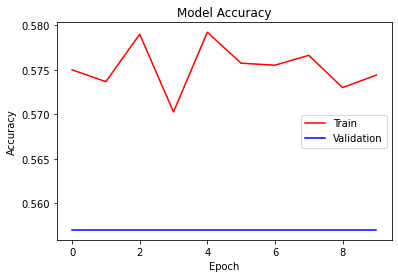

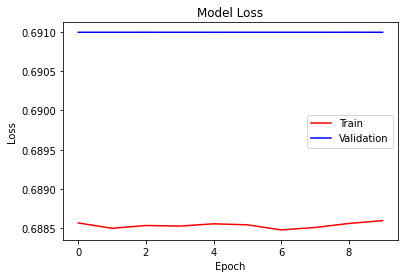

In [7]:
import numpy as np 
import pandas as pd
from keras.optimizers import SGD
from keras.preprocessing import image
from os.path import join
from PIL import Image
from scipy import misc
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Softmax, ZeroPadding2D
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Flatten, Dense, Dropout 
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from sklearn.metrics import plot_confusion_matrix
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import preprocess_input

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

model = DenseNet121(include_top= True, weights='imagenet', input_shape=(224,224,3))
x = model.output
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs = model.input, outputs=predictions)
for layer in model.layers:
    layer.trainable = False


model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.summary()

history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID)

#plot_confusion_matrix(model, train_generator, validation_genarator)  
#plt.show()  



plt.plot(history.history['accuracy'],color = 'red')
plt.plot(history.history['val_accuracy'],color = 'blue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'best')
plt.show()

plt.plot(history.history['loss'],color = 'red')
plt.plot(history.history['val_loss'],color = 'blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'best')
plt.show()
